In [1]:
# Converting layers to object
# initialise library
import numpy as np
import matplotlib as plt

print("Numpy:", np.__version__)
print("Matplotlib", plt.__version__)

!pip install nnfs

Numpy: 1.23.5
Matplotlib 3.7.2


* the purpose this activation function serves is to mimic a neuron “firing” or “not firing” based on input information. The simplest version of this is a step function. In a single neuron, if the weights · inputs + bias results in a value greater than 0, the neuron will fire and output a 1; otherwise, it will output a 0.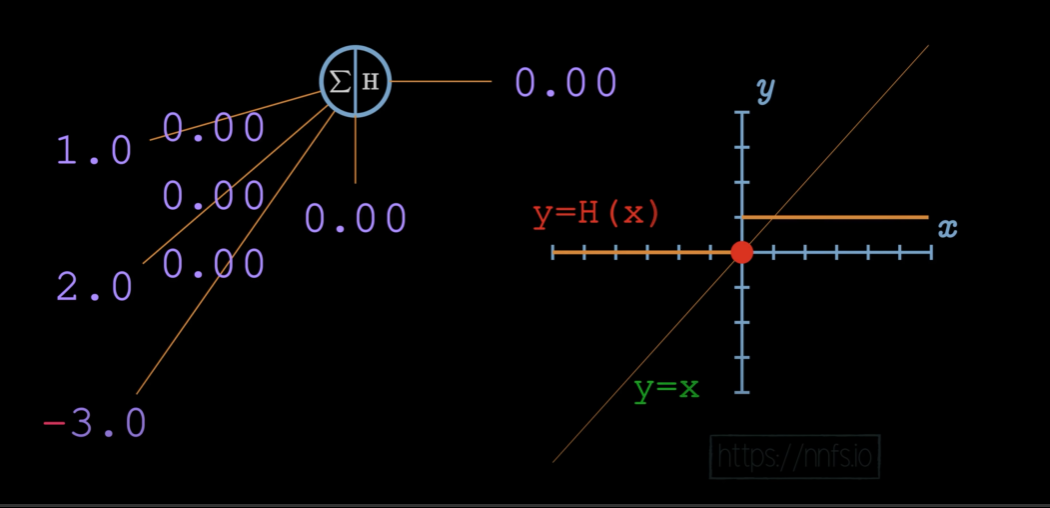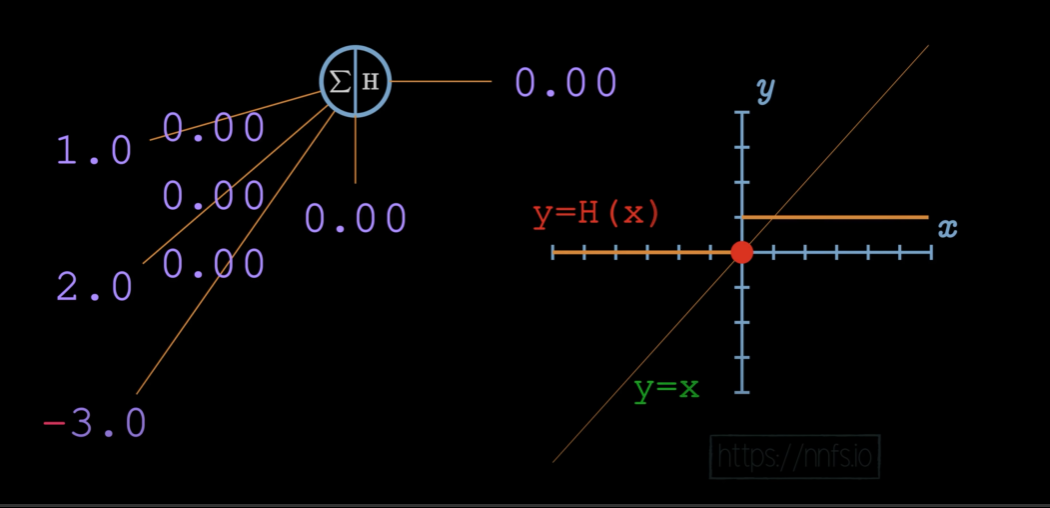

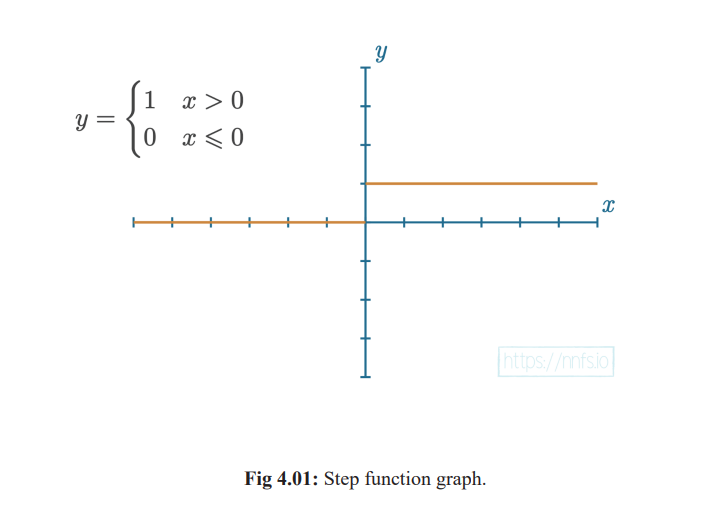

* Each neuron in the hidden layers and the output layer will have this activation function. It comes into play after you did the weights · inputs + bias

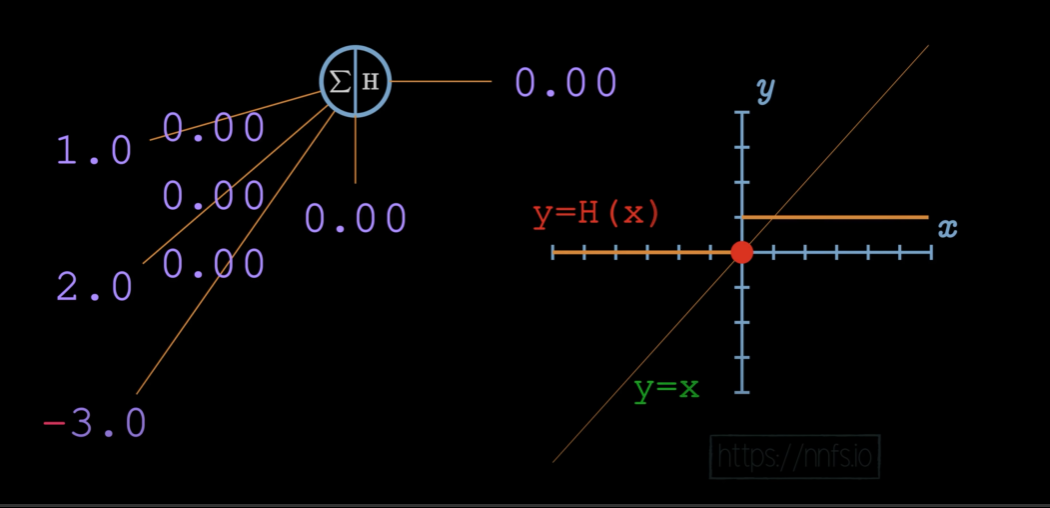

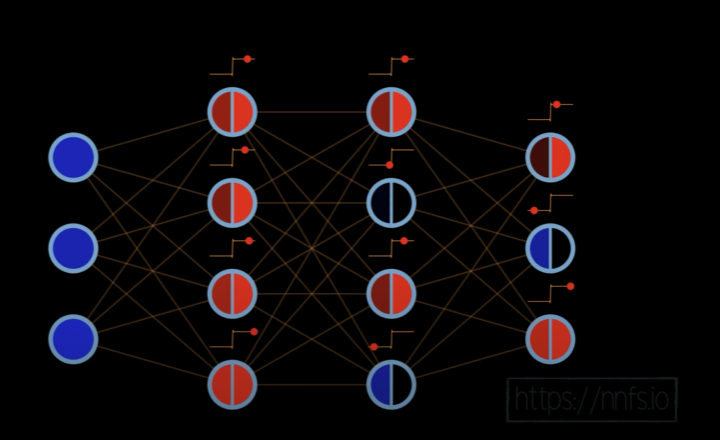

*

In [2]:
np.random.seed(0)

X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

# we code our relu part
#for i in inputs:
    #if i > 0:
        #output.append(i)
    #elif i<= 0:
        #output.append(0)
        
# in a more "pythonic" way we can code this way as well
for i in inputs:
    output.append(max(0, i))
print(output)
    


[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [3]:
# we now code our relu object
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# Its a standard convention in ML/DL that input feature sets is going to be denoted by capital X
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

# create the spiral dataset
X,y = spiral_data(100, 3)

# We are going to code our hidden layer
# The reason is called a hidden layer because we as a programmer is not in charge of that layer

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # it is convention to set the weights to be small between 0 & 1
        # setting our weights to be between 0 to 1 hence 0.1*random()
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) 
        self.biases = np.zeros((1, n_neurons)) # passing the shape, (()) is a tuple
    def foward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
# our activation function        
class Activation_Relu:
    def foward(self, inputs):
        self.output = np.maximum(0, inputs)
    
        
# lets test our class
# for neurons, you can set whatever values you want
# since the spiral has X and Y features we set our features in layer dense as 2
# we activate one layer for now
layer1 = Layer_Dense(2, 5)

# define our activation class
activation1 = Activation_Relu()


# we now pass our data X to foward function
layer1.foward(X)
print("Before activation function\n")
print(layer1.output)

#we feed our output from layer 1 to the activation function
activation1.foward(layer1.output)
print("After activation:\n")
print(activation1.output) # All negative values will be 0 once it goes into activation function



Before activation function

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815910e-04 -7.90404272e-04 -1.33452227e-03  4.65504505e-04
   4.56846210e-05]
 [-2.39994470e-03  5.93469958e-05 -2.24808278e-03  2.03573116e-04
   6.10024377e-04]
 ...
 [ 1.13291524e-01 -1.89262271e-01 -2.06855070e-02  8.11079666e-02
  -6.71350807e-02]
 [ 1.34588361e-01 -1.43197834e-01  3.09493970e-02  5.66337556e-02
  -6.29687458e-02]
 [ 1.07817926e-01 -2.00809643e-01 -3.37579325e-02  8.72561932e-02
  -6.81458861e-02]]
After activation:

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 